**Project 9 - Working with OLS**

**Linear Algebra in numpy**

In [2]:
#invertMatrix.py
import numpy as np
# create array to be transformed into vectors
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print("Array 1:", x1, sep="\n")
print("Array 2:", x2, sep="\n")
print("Array 3:", x3, sep="\n")

Array 1:
[1 2 1]
Array 2:
[4 1 5]
Array 3:
[6 8 6]


Next, transform these arrays into row vectors using matrix().

In [4]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print("Vector 1", x1, sep="\n")
print("Vector 2", x2, sep="\n")
print("Vector 3", x3, sep="\n")

Vector 1
[[1 2 1]]
Vector 2
[[4 1 5]]
Vector 3
[[6 8 6]]


Join them using the concatenate() function. We define axis=0 to stack each row on upon the next:

In [6]:
X = np.concatenate((x1, x2, x3), axis = 0)
print("X:", X, sep="\n")
#The concatenate function can be used to row-bind the three vectors we 
#created into a 3x3 matrix with the axis declared as zero.

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]


Finally, we can invert the matrix that we have made using .getI().

In [8]:
X_inverse = X.getI()
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.50000000e+00 -1.00000000e+00  2.25000000e+00]
 [ 1.50000000e+00  5.12410627e-17 -2.50000000e-01]
 [ 6.50000000e+00  1.00000000e+00 -1.75000000e+00]]


These values are not rounded, so interpretation of the inverted matrix could be more intuitive. We use the round() method from the numpy module to round values to two places.

In [10]:
X_inverse = np.round(X.getI(), 2)
print("X Inverse:", X_inverse, sep = "\n")
#The getI() function calculates the inverse of a matrix

X Inverse:
[[-8.5  -1.    2.25]
 [ 1.5   0.   -0.25]
 [ 6.5   1.   -1.75]]


**Regression Function**

In [7]:
import pandas as pd
filename = 'mpd2020.xlsx'
mgdp = pd.read_excel(filename, 
                   index_col = [0,2],
                   parse_dates = True, 
                    sheet_name = "Full data")
mgdp

/tmp/ipykernel_1865/3257489803.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mgdp = pd.read_excel(filename,


country      gdppc          pop
countrycode year                                     
AFG         1820  Afghanistan        NaN   3280.00000
            1870  Afghanistan        NaN   4207.00000
            1913  Afghanistan        NaN   5730.00000
            1950  Afghanistan  1156.0000   8150.00000
            1951  Afghanistan  1170.0000   8284.00000
...                       ...        ...          ...
ZWE         2014     Zimbabwe  1594.0000  13313.99205
            2015     Zimbabwe  1560.0000  13479.13812
            2016     Zimbabwe  1534.0000  13664.79457
            2017     Zimbabwe  1582.3662  13870.26413
            2018     Zimbabwe  1611.4052  14096.61179

[21682 rows x 3 columns]

In [5]:
filename = "efotw-2022-master-index-data-for-researchers-iso.xlsx"
data = pd.read_excel(filename, 
                     index_col = [2,0], 
                     header = [0],
                     sheet_name = "EFW Panel Data 2022 Report")
rename = {"Panel Data Summary Index": "Summary",
         "Area 1":"Size of Government",
         "Area 2":"Legal System and Property Rights",
         "Area 3":"Sound Money",
         "Area 4":"Freedom to Trade Internationally",
         "Area 5":"Regulation"}
data = data.dropna(how="all", axis = 1).rename(columns = rename)
data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas
ISO_Code_3,Year,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,2.028426
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data["RGDP Per Capita"] = mgdp["gdppc"]
data
#This code column binds GDP data for countries from the Madison project
#database to the economic freedom data from the Fraiser institute 

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita
ISO_Code_3,Year,,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742,NaN
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103,NaN
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854,NaN
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924,NaN
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,2.028426,15289.0
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1172.0
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.0


In [15]:
!pip install xlwt
data.sort_index(inplace = True)
# save to file. We will need to reimport for the homework question
data.to_excel("EFWAndRGDP.xlsx")
data.to_csv("fraserDataWithRGDPPC.csv")
data
#The xlwt function allows us to write our combined dataset into an excel
#file for use later on

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                  
AGO        1970         AO  Sub-Saharan Africa   
           1975         AO  Sub-Saharan Africa   
           1980         AO  Sub-Saharan Africa   
           1985         AO  Sub-Saharan Africa   
           1990         AO  Sub-Saharan Africa   
...                    ...                 ...   
ZWE        2016         ZW  Sub-Saharan Africa   
           2017         ZW  Sub-Saharan Africa   
           2018         ZW  Sub-Saharan Africa   
           2019         ZW  Sub-Saharan Africa   
           2020         ZW  Sub-Saharan Africa   

                World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                        
AGO        1970                                                NaN                                                                                     
           1975                                                NaN                                                                                     
           1980                                                NaN                                                                                     
           1985                                                NaN                                                                                     
           1990                                                 LM                                                                                     
...                                                            ...                                                                                     
ZWE        2016                                                  L                                                                                     
           2017                                                  L                                                                                     
           2018                                                 LM                                                                                     
           2019                                                 LM                                                                                     
           2020                                                 LM                                                                                     

                Countries   Summary  Size of Government  \
ISO_Code_3 Year                                           
AGO        1970    Angola       NaN                 NaN   
           1975    Angola       NaN                 NaN   
           1980    Angola       NaN                 NaN   
           1985    Angola       NaN                 NaN   
           1990    Angola       NaN                 NaN   
...                   ...       ...                 ...   
ZWE        2016  Zimbabwe  6.121996            5.332597   
           2017  Zimbabwe  5.599886            4.699843   
           2018  Zimbabwe  5.876298            5.170946   
           2019  Zimbabwe  4.719465            5.628359   
           2020  Zimbabwe  4.480000            5.562008   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        1970                               NaN          NaN   
           1975                               NaN          NaN   
           1980                               NaN          NaN   
           1985                               NaN          NaN   
           1990                               NaN          NaN   
...                                           ...          ...   
ZWE        2016                          4.056407     8.086016   
           2017           

In [17]:
# Remove any columns not used
data = data[data.keys()[4:]]
data
#This code removes all of the columns before the 'summary' column from 
#our dataset.

Summary  Size of Government  \
ISO_Code_3 Year                                 
AGO        1970       NaN                 NaN   
           1975       NaN                 NaN   
           1980       NaN                 NaN   
           1985       NaN                 NaN   
           1990       NaN                 NaN   
...                   ...                 ...   
ZWE        2016  6.121996            5.332597   
           2017  5.599886            4.699843   
           2018  5.876298            5.170946   
           2019  4.719465            5.628359   
           2020  4.480000            5.562008   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        1970                               NaN          NaN   
           1975                               NaN          NaN   
           1980                               NaN          NaN   
           1985                               NaN          NaN   
           1990                               NaN          NaN   
...                                           ...          ...   
ZWE        2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   
           2019                          4.026568     1.413372   
           2020                          3.965267     1.250000   

                 Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                 
AGO        1970                               NaN         NaN   
           1975                               NaN         NaN   
           1980                               NaN         NaN   
           1985                               NaN         NaN   
           1990                               NaN         NaN   
...                                           ...         ...   
ZWE        2016                          6.404937    6.520805   
           2017                          4.503965    6.399757   
           2018                          6.396649    6.303135   
           2019                          6.397045    6.132583   
           2020                          5.565207    6.080774   

                 Standard Deviation of the 5 EFW Areas  RGDP Per Capita  
ISO_Code_3 Year                                                          
AGO        1970                                    NaN        2818.0000  
           1975                                    NaN        1710.0000  
           1980                                    NaN        1532.0000  
           1985                                    NaN        1242.0000  
           1990                                    NaN        1384.0000  
...                                                ...              ...  
ZWE        2016                               1.498126        1534.0000  
           2017                               1.631512        1582.3662  
           2018                               1.262218        1611.4052  
           2019                               2.064439              NaN  
           2020                               1.975388              NaN  

[4455 rows x 8 columns]

Time series data is often subject to trend. This is the case with real GDP per capita data. Real GDP per capita tends to grow at a steady rate. To offset this effect we can include the lag of real GDP per capita in the regression that we run. Later, we will try to confront the same problem by estimating the annual pct_change of real GDP per capita.

The years are ordered from latest to earliest. We need them to start from earliest. We will save the index of all but the last year.

In [21]:
data = data.dropna(axis=0)
#Drop NA values from the combined dataset
data.loc["GBR"]

,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita
Year,,,,,,,,
1970,6.035320,4.622300,7.344851,7.312995,3.981406,7.489366,1.703731,17162.0000
1975,6.151944,4.541987,7.665156,4.867740,6.632374,6.996952,1.367040,18884.0000
1980,6.970904,5.306871,7.684342,5.867571,8.801656,7.077147,1.401388,20612.0000
1985,8.062849,5.710748,8.032417,9.079055,9.136294,8.334242,1.395692,22579.0000
1990,8.200173,6.519684,8.164475,8.482826,9.139436,8.650617,0.998742,26189.0000
1995,8.348727,6.377623,8.281839,9.569957,9.210126,8.254403,1.238097,27861.2158
2000,8.588978,7.094016,8.436520,9.301871,9.388696,8.675363,0.923704,31946.0363
2001,8.508987,6.861468,8.467307,9.534175,9.251954,8.411201,1.040260,32660.4414
2002,8.588978,7.039989,8.386749,9.687376,9.257991,8.533949,1.012058,33271.3025


**Running a Regression**

An ordinary least squares regression genereates a predictor that minimuzes the sum squared errors represented by the difference between the observed values and the predicted values generated from by the regression. The predictor is defined by separate linear parameters for each exogenous variable. For each observation, each parameter is multiplied by the value of the variable represent the effect of that variable on the endogenous variabel
.

The result is a predictor that can be compared to the observed data. Next, we will generate such a linear prediction and consider how we quantify the variance that is explained by that prediction.

In [25]:
reg_vars = list(data.keys())
print(reg_vars)
del reg_vars[-2]
del reg_vars[0]
#remove 'Summary' and 'Standard Dev. of 5 EFW Areas' from the list of
#regression variables 
reg_vars

['Summary', 'Size of Government', 'Legal System and Property Rights', 'Sound Money', 'Freedom to Trade Internationally', 'Regulation', 'Standard Deviation of the 5 EFW Areas', 'RGDP Per Capita']


['Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [29]:
y_var = [reg_vars[-1]]
#Declare the dependent variable as Real GDP per capita
print(y_var)
x_vars = reg_vars[:-1]
#Declare the explanatory variables 
print(x_vars)
reg_data = data[reg_vars]
#Extract regression data using subscripts
reg_data.corr().round(2)
#Calculate correlation coeffecients 

['RGDP Per Capita']
['Size of Government', 'Legal System and Property Rights', 'Sound Money', 'Freedom to Trade Internationally', 'Regulation']


,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
Size of Government,1.00,-0.13,0.16,0.20,0.17,-0.18
Legal System and Property Rights,-0.13,1.00,0.53,0.64,0.66,0.66
Sound Money,0.16,0.53,1.00,0.70,0.62,0.46
Freedom to Trade Internationally,0.20,0.64,0.70,1.00,0.69,0.52
Regulation,0.17,0.66,0.62,0.69,1.00,0.53
RGDP Per Capita,-0.18,0.66,0.46,0.52,0.53,1.00


In [31]:
import statsmodels.api as sm
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
#Add a new column to the X dataframe with all its values equal to one
#to include a constant term in the model
results = sm.OLS(y, X).fit()
#Pass the OLS method to the dependent var 'y' and the independent vars 'X'
#to calculate a least-squares fit for the specified model 

In [33]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
#Use the predict() function to calculate predicted values for the dependent 
#var and column bind the results to the reg_data dataframe
reg_data

/tmp/ipykernel_1865/734817014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


Size of Government  Legal System and Property Rights  \
ISO_Code_3 Year                                                         
AGO        2005            6.886311                          3.129619   
           2006            5.162277                          3.238314   
           2007            4.963676                          3.224507   
           2008            4.715589                          3.382642   
           2009            7.455501                          3.394515   
...                             ...                               ...   
ZWE        2014            6.771807                          3.930143   
           2015            6.964753                          4.108142   
           2016            5.332597                          4.056407   
           2017            4.699843                          4.071445   
           2018            5.170946                          4.041897   

                 Sound Money  Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                              
AGO        2005     1.270081                          5.356979    4.511067   
           2006     3.807267                          5.302944    5.118114   
           2007     4.015297                          5.139768    5.348260   
           2008     4.653201                          5.181950    5.185843   
           2009     4.901540                          5.503538    5.007256   
...                      ...                               ...         ...   
ZWE        2014     7.664303                          6.398692    5.039824   
           2015     7.859669                          6.509231    6.555970   
           2016     8.086016                          6.404937    6.520805   
           2017     7.983888                          4.503965    6.399757   
           2018     7.312324                          6.396649    6.303135   

                 RGDP Per Capita  RGDP Per Capita Predictor  
ISO_Code_3 Year                                              
AGO        2005        3708.7706               -5474.902171  
           2006        4592.3373                3221.099672  
           2007        5773.5483                4184.555105  
           2008        6743.7482                5776.385317  
           2009        7087.6041               -1464.025089  
...                          ...                        ...  
ZWE        2014        1594.0000                6250.400915  
           2015        1560.0000                9989.206335  
           2016        1534.0000               14271.539452  
           2017        1582.3662               13288.328954  
           2018        1611.4052               13484.096702  

[3145 rows x 7 columns]

**Calculate SSE, SSR, and SST**

Now that we have saved the predictor, we can generate our sum squared errors, sum squared due to regression, and total sum squares. These will be used to generate our value, which estimates the variance explained by the predictor.

In [37]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y.sub(y_hat))
#The diff between the actual values of y and those values of y predicted
#by the regression (the errors)
reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
#The squared differences between the predicted values of y and the mean of y
reg_data["Squared Residuals"] = (y.sub(y_hat)) ** 2
#The squared error terms
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
#The squares of the differences between the actual values of y and the mean of y
reg_data

Size of Government  Legal System and Property Rights  \
ISO_Code_3 Year                                                         
AGO        2005            6.886311                          3.129619   
           2006            5.162277                          3.238314   
           2007            4.963676                          3.224507   
           2008            4.715589                          3.382642   
           2009            7.455501                          3.394515   
...                             ...                               ...   
ZWE        2014            6.771807                          3.930143   
           2015            6.964753                          4.108142   
           2016            5.332597                          4.056407   
           2017            4.699843                          4.071445   
           2018            5.170946                          4.041897   

                 Sound Money  Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                              
AGO        2005     1.270081                          5.356979    4.511067   
           2006     3.807267                          5.302944    5.118114   
           2007     4.015297                          5.139768    5.348260   
           2008     4.653201                          5.181950    5.185843   
           2009     4.901540                          5.503538    5.007256   
...                      ...                               ...         ...   
ZWE        2014     7.664303                          6.398692    5.039824   
           2015     7.859669                          6.509231    6.555970   
           2016     8.086016                          6.404937    6.520805   
           2017     7.983888                          4.503965    6.399757   
           2018     7.312324                          6.396649    6.303135   

                 RGDP Per Capita  RGDP Per Capita Predictor     Residuals  \
ISO_Code_3 Year                                                             
AGO        2005        3708.7706               -5474.902171   9183.672771   
           2006        4592.3373                3221.099672   1371.237628   
           2007        5773.5483                4184.555105   1588.993195   
           2008        6743.7482                5776.385317    967.362883   
           2009        7087.6041               -1464.025089   8551.629189   
...                          ...                        ...           ...   
ZWE        2014        1594.0000                6250.400915  -4656.400915   
           2015        1560.0000                9989.206335  -8429.206335   
           2016        1534.0000               14271.539452 -12737.539452   
           2017        1582.3662               13288.328954 -11705.962754   
           2018        1611.4052               13484.096702 -11872.691502   

                 Squared Explained  Squared Residuals  Squared Totals  
ISO_Code_3 Year                                                        
AGO        2005       4.693919e+08       8.433985e+07    1.557949e+08  
           2006       1.682067e+08       1.880293e+06    1.345186e+08  
           2007       1.441440e+08       2.524899e+06    1.085140e+08  
           2008       1.084549e+08       9.357909e+05    8.924211e+07  
           2009       3.116841e+08       7.313036e+07    8.286367e+07  
...                            ...                ...             ...  
ZWE        2014       9.880662e+07       2.168207e+07    2.130593e+08  
           2015       3.845670e+07       7.105152e+07    2.140531e+08  
           2016       3.682612e+06       1.622449e+08    2.148145e+08  
           2017       8.422902e+06       1.370296e+08    2.133991e+08  
           2018       7.324904e+06       1.409608e+08    2.125515e+08  

[3145 rows x 11 columns]

In [39]:
SSR = reg_data["Squared Explained"].sum()
#The summation of the explained squares
SSE = reg_data["Squared Residuals"].sum()
#The summation of the squared errors
SST = reg_data["Squared Totals"].sum()
#The summation of the total squares
SSR,SSE,SST

(450042843462.08417, 476075689815.21045, 926118533277.295)

**Calculate Estimator Variance**

In [42]:
n = results.nobs
#returns the number of obs. from most recent results
k = len(results.params)
#returns the number of parameters estimated from most recent results
estimator_variance = SSE / (n - k)
#estimator variance is the sum of squares explained divided by degrees of
#freedom
n, k, estimator_variance

(3145.0, 6, 151664762.60439962)

In [44]:
cov_matrix = results.cov_params()
#returns the covariance matrix from the results object
cov_matrix

,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Constant
Size of Government,40914.793154,15255.069988,-1703.383623,-8958.214157,-10448.584144,-2.067504e+05
Legal System and Property Rights,15255.069988,38475.583705,-2060.902767,-14360.980502,-22112.680701,-4.271058e+04
Sound Money,-1703.383623,-2060.902767,31363.960883,-15910.601600,-10972.822920,-4.080877e+04
Freedom to Trade Internationally,-8958.214157,-14360.980502,-15910.601600,44857.357302,-14664.804830,5.259640e+04
Regulation,-10448.584144,-22112.680701,-10972.822920,-14664.804830,78985.583047,-1.570828e+05
Constant,-206750.428690,-42710.577560,-40808.774501,52596.396443,-157082.849671,2.648421e+06


In [46]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

,Beta,Standard Error,t-stats
Size of Government,-2752.213782,202.274055,-13.606361
Legal System and Property Rights,3966.073311,196.151940,20.219394
Sound Money,902.358447,177.098732,5.095228
Freedom to Trade Internationally,1279.872496,211.795555,6.042962
Regulation,2141.030500,281.043739,7.618140


**Calculate R2**

This compares the average squared distance between the predicted values and the average value against the average squared distance between observed values and average values. Ordinary least squares regression minimizes the squared distance between the predicted value and the average value. If values are perfectly predicted, then the SSR would equal the SST. Usually, the SSR is less than the SST. It will never be greater than the SST

In [50]:
r2 = SSR/SST
r2
#The ratio of the sum of squares explained divided by the total sum of squares
#gives the proportion of explained variations in the dependent var. that can be
#explained by the model

0.4859451865945263

**Adjusted R-Squared**

In [53]:
r2_adjusted = 1 - (SSE / (n - k)) / (SST / (n - 1))
r2_adjusted
#The adjusted R2 value penalizes the addition of explanatory vars to the model
#This encourages adding explanatory vars that are relavent while dropping those that aren't. 

0.48512636720394786

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     593.5
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:16:26   Log-Likelihood:                -34081.
No. Observations:                3145   AIC:                         6.817e+04
Df Residuals:                    3139   BIC:                         6.821e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2752.2138    202.274    -13.606      0.000   -3148.817   -2355.611
Legal System and Property Rights  3966.0733    196.152     20.219      0.000    3581.474    4350.672
Sound Money                        902.3584    177.099      5.095      0.000     555.117    1249.599
Freedom to Trade Internationally  1279.8725    211.796      6.043      0.000     864.601    1695.144
Regulation                        2141.0305    281.044      7.618      0.000    1589.982    2692.079
Constant                          -1.66e+04   1627.397    -10.197      0.000   -1.98e+04   -1.34e+04
==============================================================================
Omnibus:                     2952.722   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189244.770
Skew:                           4.324   Prob(JB):                         0.00
Kurtosis:                      40.005   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Common Problems with OLS**

Although our regression generates a large t-statitic, our errors are not normally distributed. This is due in part to our use of untransformed time-series data. To make the data normally distributed, we could log the data or calculate either the annual difference or percent change. Logging the data will maintain levels. Since this data suffers from a trend, we will calculate the annual difference of index values and the annual percent change of real GDP per capita values after we review the distribution of residuals.

(array([-50000., -25000.,      0.,  25000.,  50000.,  75000., 100000.,
        125000., 150000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(-25000.0, 0, '−25000'),
  Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000')])

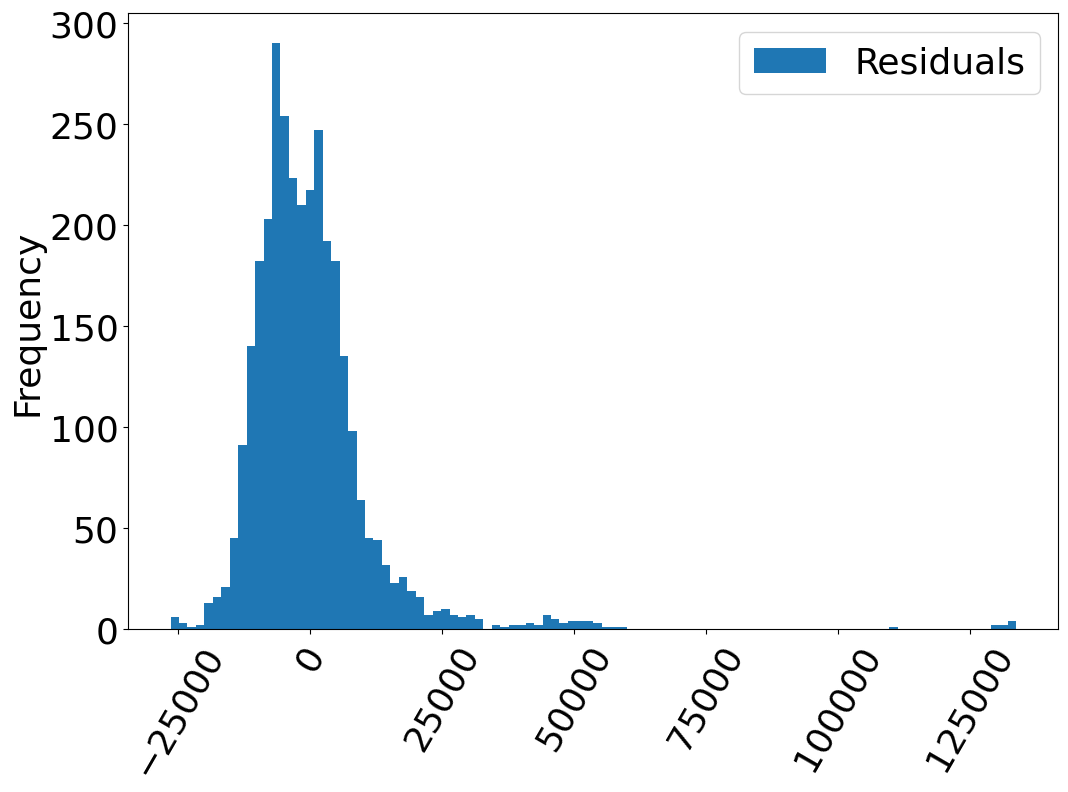

In [59]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

<Axes: ylabel='Frequency'>

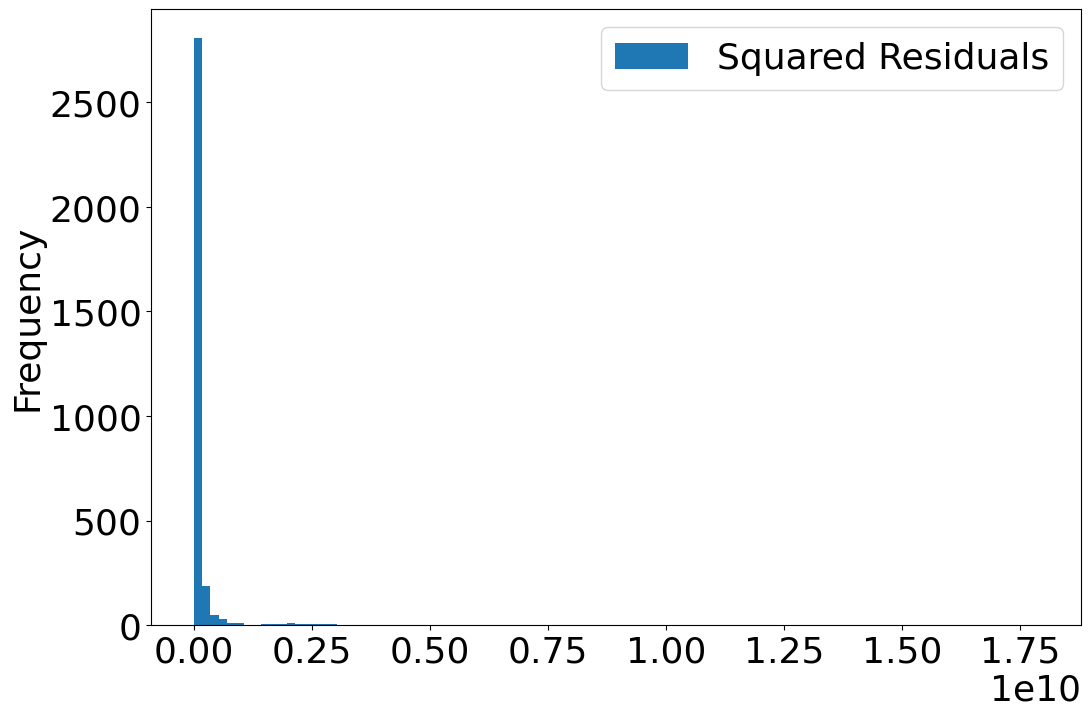

In [61]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

In [63]:
##### countries = data.groupby("ISO_Code").mean().index
# for country in countries:
#     fig, ax = plt.subplots(figsize = (12,8))
#     reg_data[y_var + [y_var[0] + " Predictor"]].loc[country].plot.line(ax = ax, legend = False)    
#     ax.set_title(country)

**Regression logged differences**

In [68]:
import numpy as np
years_diff = 5
reg_data = data
reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code_3")["RGDP Per Capita"].diff(years_diff)
#group countries (cross-sections) using the country code
reg_data = reg_data.replace([np.inf, -np.inf], np.nan)
reg_data.loc["USA"]

/tmp/ipykernel_1865/990030110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = np.log(data).groupby("ISO_Code_3")["RGDP Per Capita"].diff(years_diff)


,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita
Year,,,,,,,,
1970,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,1.648185,NaN
1975,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,1.483975,NaN
1980,8.101368,5.788734,8.684269,9.122306,8.544966,8.359863,1.322304,NaN
1985,8.295413,6.582616,8.726823,9.339660,8.505198,8.335644,1.031484,NaN
1990,8.461126,7.262163,8.350956,9.669842,8.537828,8.477998,0.853932,NaN
1995,8.588435,7.446569,8.587870,9.787931,8.594211,8.538840,0.828418,0.497226
2000,8.648077,7.704726,8.773170,9.607665,8.466601,8.739485,0.683215,0.569768
2001,8.509072,7.521319,8.615158,9.612028,8.397002,8.464019,0.744511,0.437840
2002,8.568646,7.673536,8.370127,9.724310,8.298912,8.819880,0.760212,0.337209


In [70]:
reg_data.dropna()

Summary  Size of Government  \
ISO_Code_3 Year                                 
AGO        2010  5.420828            6.310978   
           2011  5.001537            6.156240   
           2012  5.470743            6.242498   
           2013  5.161267            4.975705   
           2014  5.071419            5.491864   
...                   ...                 ...   
ZWE        2014  5.999147            6.771807   
           2015  6.449595            6.964753   
           2016  6.121996            5.332597   
           2017  5.599886            4.699843   
           2018  5.876298            5.170946   

                 Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                  
AGO        2010                          3.573909     5.742319   
           2011                          3.529052     5.743248   
           2012                          3.407577     6.681550   
           2013                          3.334574     6.860318   
           2014                          3.348855     6.888776   
...                                           ...          ...   
ZWE        2014                          3.930143     7.664303   
           2015                          4.108142     7.859669   
           2016                          4.056407     8.086016   
           2017                          4.071445     7.983888   
           2018                          4.041897     7.312324   

                 Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                 
AGO        2010                          5.755618    5.722125   
           2011                          5.188942    4.387177   
           2012                          5.855897    5.166821   
           2013                          5.694048    4.960447   
           2014                          4.835320    4.769493   
...                                           ...         ...   
ZWE        2014                          6.398692    5.039824   
           2015                          6.509231    6.555970   
           2016                          6.404937    6.520805   
           2017                          4.503965    6.399757   
           2018                          6.396649    6.303135   

                 Standard Deviation of the 5 EFW Areas  RGDP Per Capita  
ISO_Code_3 Year                                                          
AGO        2010                               1.061803         0.706954  
           2011                               1.056438         0.557050  
           2012                               1.280530         0.349627  
           2013                               1.282783         0.232391  
           2014                               1.283899         0.201867  
...                                                ...              ...  
ZWE        2014                               1.476750         0.215452  
           2015                               1.390903         0.106888  
           2016                               1.498126         0.012463  
           2017                               1.631512        -0.013579  
           2018                               1.262218         0.004606  

[2386 rows x 8 columns]

In [72]:
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()

/tmp/ipykernel_1865/3386029528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
/tmp/ipykernel_1865/3386029528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Predictor"] = results.predict()


In [74]:
y, X

(                 RGDP Per Capita
 ISO_Code_3 Year                 
 AGO        2010         0.706954
            2011         0.557050
            2012         0.349627
            2013         0.232391
            2014         0.201867
 ...                          ...
 ZWE        2014         0.215452
            2015         0.106888
            2016         0.012463
            2017        -0.013579
            2018         0.004606
 
 [2386 rows x 1 columns],
                  Size of Government  Legal System and Property Rights  \
 ISO_Code_3 Year                                                         
 AGO        2010            6.310978                          3.573909   
            2011            6.156240                          3.529052   
            2012            6.242498                          3.407577   
            2013            4.975705                          3.334574   
            2014            5.491864                          3.348855   
 ...        

In [76]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     14.78
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           2.68e-14
Time:                        17:56:52   Log-Likelihood:                 83.917
No. Observations:                2386   AIC:                            -155.8
Df Residuals:                    2380   BIC:                            -121.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0084      0.005      1.840      0.066      -0.001       0.017
Legal System and Property Rights     0.0057      0.005      1.201      0.230      -0.004       0.015
Sound Money                         -0.0069      0.005     -1.416      0.157      -0.017       0.003
Freedom to Trade Internationally     0.0325      0.006      5.294      0.000       0.020       0.045
Regulation                          -0.0073      0.007     -1.101      0.271      -0.020       0.006
Constant                            -0.0308      0.041     -0.747      0.455      -0.112       0.050
==============================================================================
Omnibus:                      883.300   Durbin-Watson:                   0.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6968.587
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                      10.789   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_1865/3043588271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Residuals"] = results.resid


<Axes: ylabel='Frequency'>

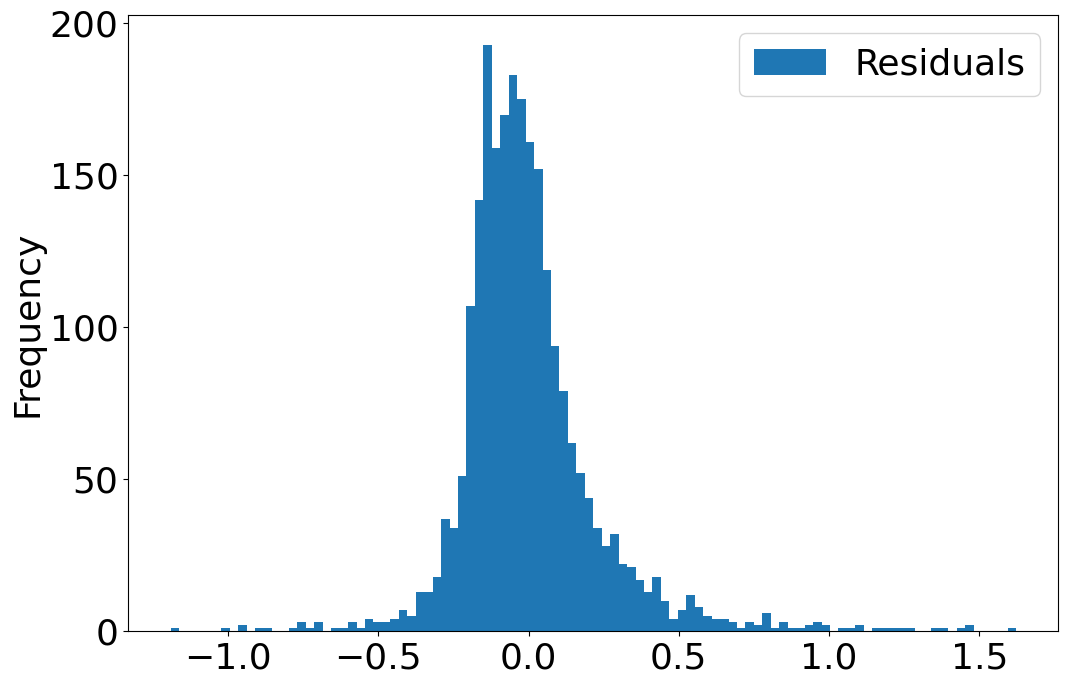

In [78]:
r_df["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [80]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

,Beta Estimates,t-stats,p-values,Standard Errors
Size of Government,0.008,1.840,0.066,0.005
Legal System and Property Rights,0.006,1.201,0.230,0.005
Sound Money,-0.007,-1.416,0.157,0.005
Freedom to Trade Internationally,0.033,5.294,0.000,0.006
Regulation,-0.007,-1.101,0.271,0.007
Constant,-0.031,-0.747,0.455,0.041


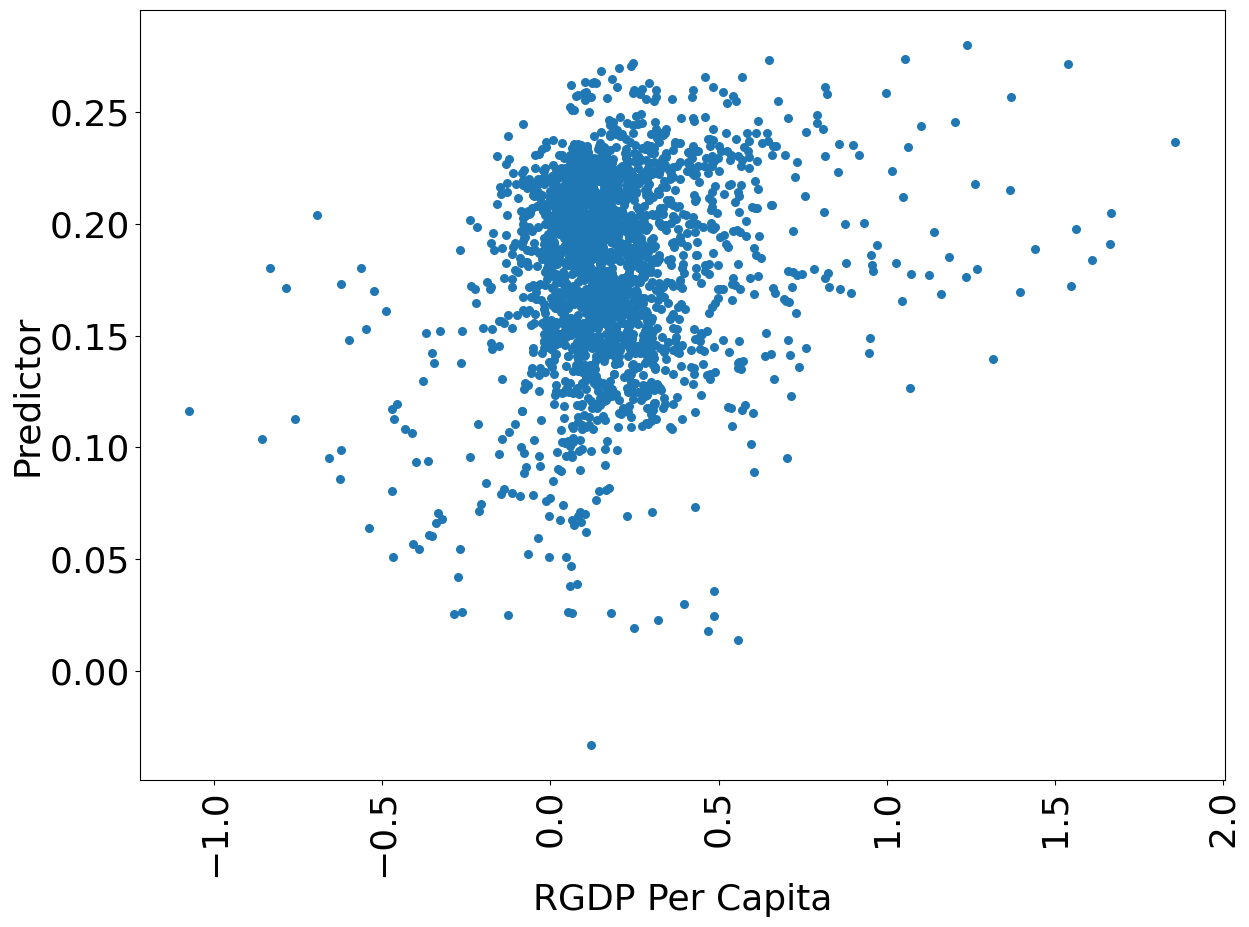

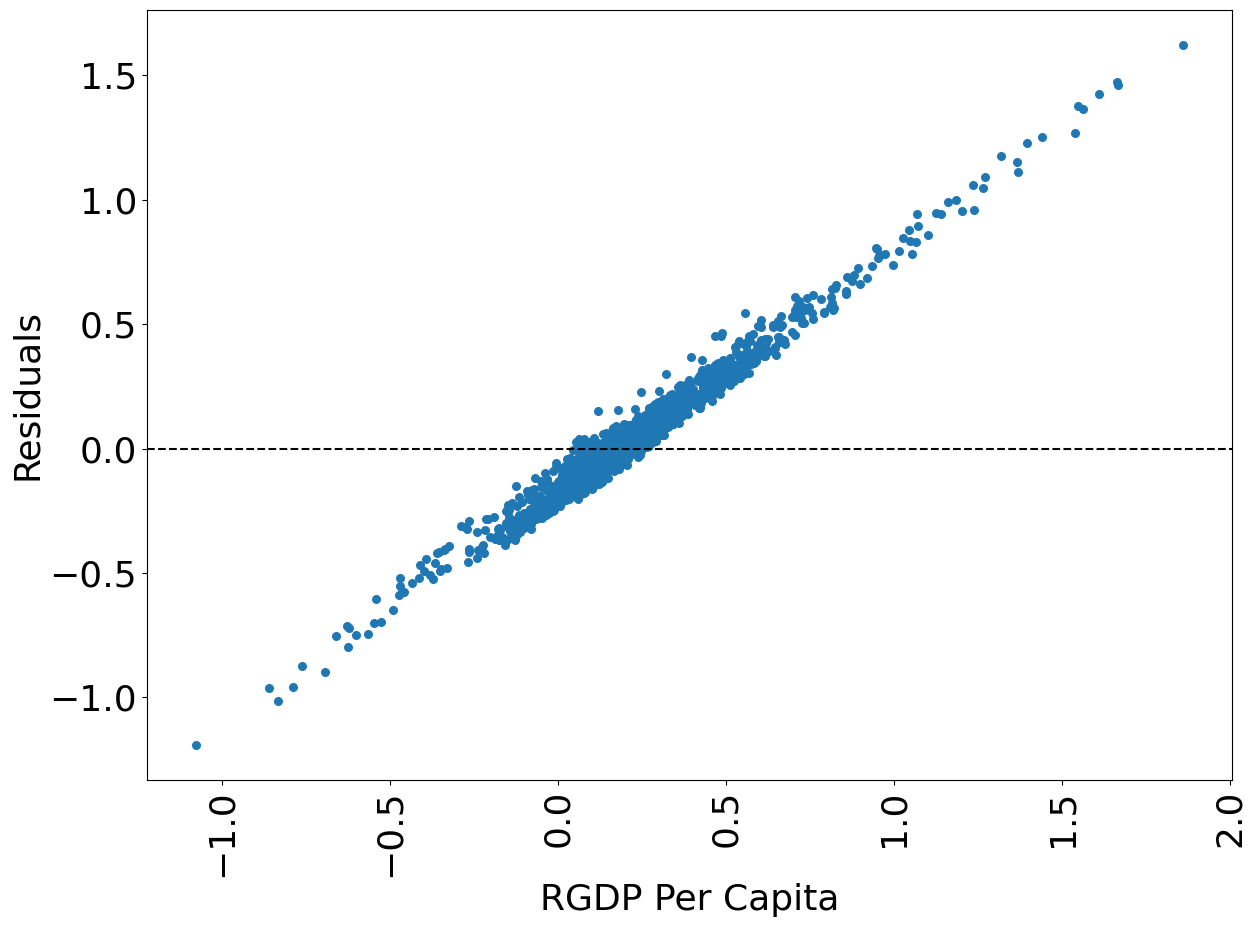

In [82]:
fig, ax = plt.subplots(figsize = (14,10))
r_df.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_df.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

In [84]:
countries = r_df.groupby("ISO_Code_3").mean().index
plot_data = r_df[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

/tmp/ipykernel_1865/1481061595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[key] = plot_data[key] + 1


RGDP Per Capita  Predictor
ISO_Code_3 Year                            
AGO        2010         1.706954   1.148006
           2011         1.557050   1.137822
           2012         1.349627   1.147311
           2013         1.232391   1.131221
           2014         1.201867   1.108953
...                          ...        ...
ZWE        2014         1.215452   1.166507
           2015         1.106888   1.160253
           2016         1.012463   1.141484
           2017         0.986421   1.076040
           2018         1.004606   1.146728

[2386 rows x 2 columns]

In [86]:
#for country in countries:
    #fig, ax = plt.subplots(figsize = (12,8))

    #plot_data[y_var + ["Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    #ax.set_title(country)
    #plt.plot()

In [88]:
reg_data["RGDP Per Capita Lag"] = reg_data[
    "RGDP Per Capita"].groupby("ISO_Code_3").shift(years_diff)
#Create a 5-year lag for the RGDP variable and c-bind it to the reg_data
#dataframe
x_vars.append("RGDP Per Capita Lag")
#add the lagged GDP to the list of explanatory variables
r_data = reg_data.dropna()
y = r_data.dropna(axis = 0, how = "any")[y_var]
X = r_data.dropna(axis = 0, how = "any")[x_vars]
#Drop any NA values
X["Constant"] = 1
#Add a constant term 
results = sm.OLS(y, X).fit()
r_data["Predictor"] = results.predict()
#add predicted values for y to the r_data object

/tmp/ipykernel_1865/3062481228.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Predictor"] = results.predict()


In [90]:
results.summary()
#The inclusion of the lag of the GDP variable has improved the explanatory
#power of the variable 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     58.65
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           5.29e-66
Time:                        18:14:14   Log-Likelihood:                 1220.2
No. Observations:                1667   AIC:                            -2426.
Df Residuals:                    1660   BIC:                            -2389.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0187      0.003      6.721      0.000       0.013       0.024
Legal System and Property Rights    -0.0144      0.003     -5.037      0.000      -0.020      -0.009
Sound Money                          0.0019      0.003      0.581      0.561      -0.004       0.008
Freedom to Trade Internationally     0.0021      0.004      0.537      0.591      -0.006       0.010
Regulation                           0.0109      0.004      2.615      0.009       0.003       0.019
RGDP Per Capita Lag                  0.1709      0.011     15.337      0.000       0.149       0.193
Constant                            -0.0677      0.026     -2.657      0.008      -0.118      -0.018
==============================================================================
Omnibus:                      394.469   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3026.183
Skew:                          -0.892   Prob(JB):                         0.00
Kurtosis:                       9.355   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_1865/961559403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Residuals"] = results.resid


<Axes: ylabel='Frequency'>

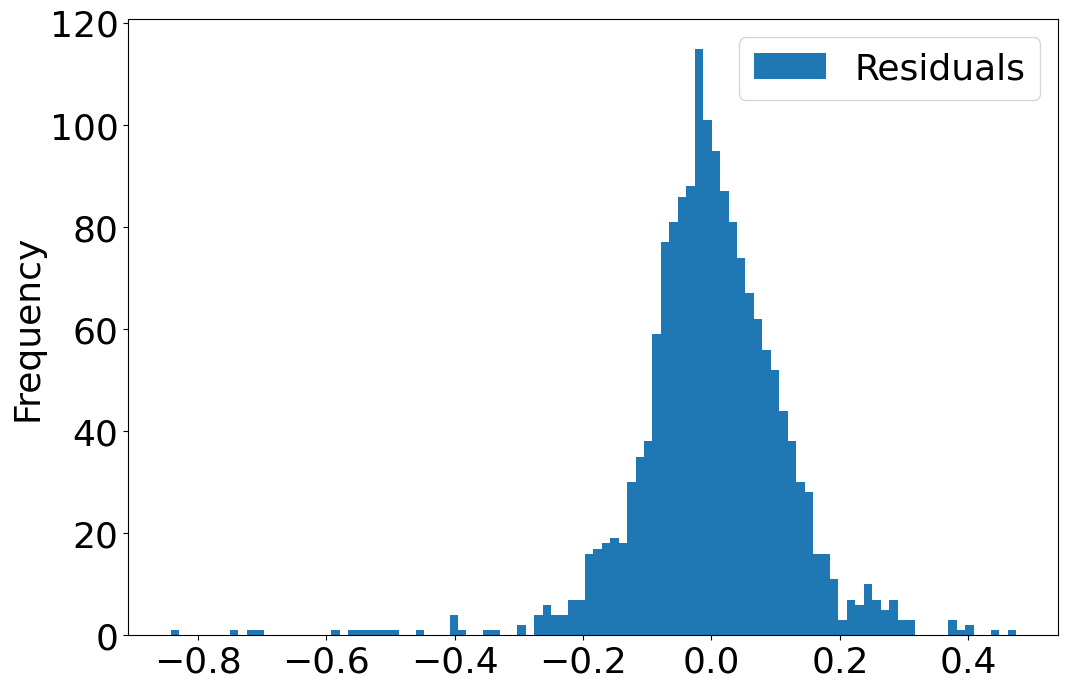

In [92]:
r_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [94]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)
#Use builts-ins to declare objects that store the results of the regression
# and build a results dictionary and convert it to a DF to organize it

,Beta Estimates,t-stats,p-values,Standard Errors
Size of Government,0.019,6.721,0.000,0.003
Legal System and Property Rights,-0.014,-5.037,0.000,0.003
Sound Money,0.002,0.581,0.561,0.003
Freedom to Trade Internationally,0.002,0.537,0.591,0.004
Regulation,0.011,2.615,0.009,0.004
RGDP Per Capita Lag,0.171,15.337,0.000,0.011
Constant,-0.068,-2.657,0.008,0.026
